# Introdução

O conjunto de dados Boston Housing é um dos mais tradicionais na área de Machine Learning, contendo variáveis socioeconômicas e estruturais de bairros de Boston, com o objetivo de prever o valor médio das casas (MEDV).

O objetivo deste experimento é:

- Compreender as variáveis que afetam o preço das casas

- Treinar um modelo de Regressão utilizando Redes Neurais (MLP)

- Avaliar seu desempenho por métricas como MSE, MAE e R²

- Discutir resultados, limitações e melhorias possíveis

# Métodologia

Leitura e compreensão dos dados

- Carregamento da base .csv

- Análise exploratória: estatísticas, correlação, histogramas

- Identificação de variáveis mais relevantes

Pré-processamento

- Normalização dos atributos com StandardScaler

- Separação dos dados em treino e teste (80/20)

Escolha do modelo

- Optou-se por uma Rede Neural MLP (Multilayer Perceptron) porque:

- Trabalha bem com problemas de regressão contínua

- Permite modelar relações não lineares

- Simples mas poderosa para esse caso

Arquitetura utilizada

- Input Layer: 13 neurônios (um para cada atributo)

- Hidden Layer 2: 64 neurônios, ReLU

- Hidden Layer 3: 32 neurônios, ReLU

- Hidden Layer 4: 16 neurônios, ReLU

- Output Layer: 1 neurônio (valor previsto)

- 2.5 Propriedades de treinamento

- Optimizer: Adam (learning rate = 0.001)

- Loss: MSE

- Métrica secundária: MAE

- Épocas: 400

- Batch size: 16

- Validation split: 20% do treino

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras

# Carregamento e Análise dos Dados

Aqui carregamos a base HousingData e fazemos uma análise exploratória inicial.

In [46]:
df = pd.read_csv("data/HousingData.csv")

# Remove colunas categóricas (CHAS) ou transforma depois
df = df.drop(columns=["CHAS"], errors="ignore")

# Trata valores ausentes (muito comum nesse dataset)
df.fillna(df.mean(numeric_only=True), inplace=True)

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.554695    6.284634   68.518519   
std      8.545770   22.92

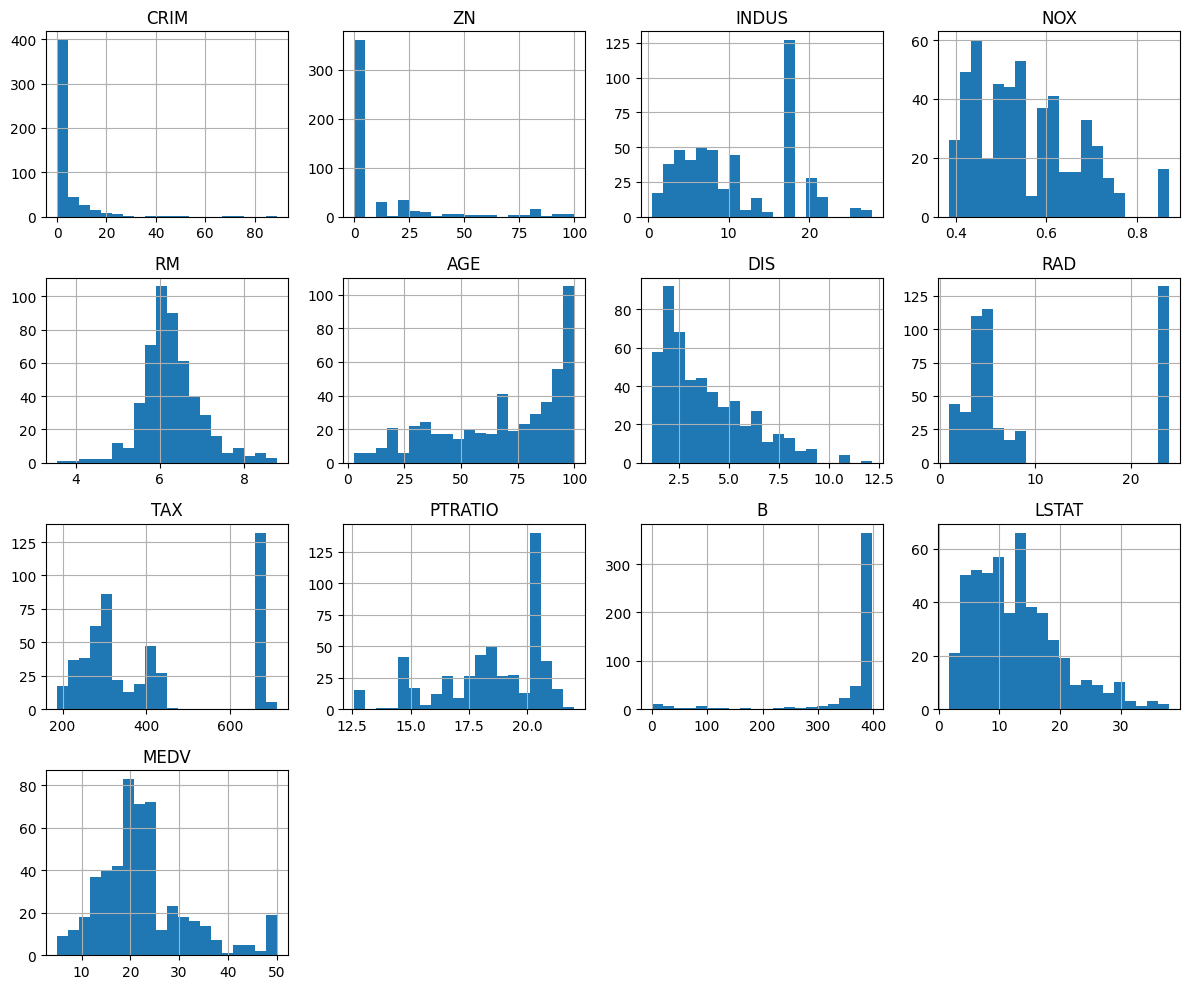

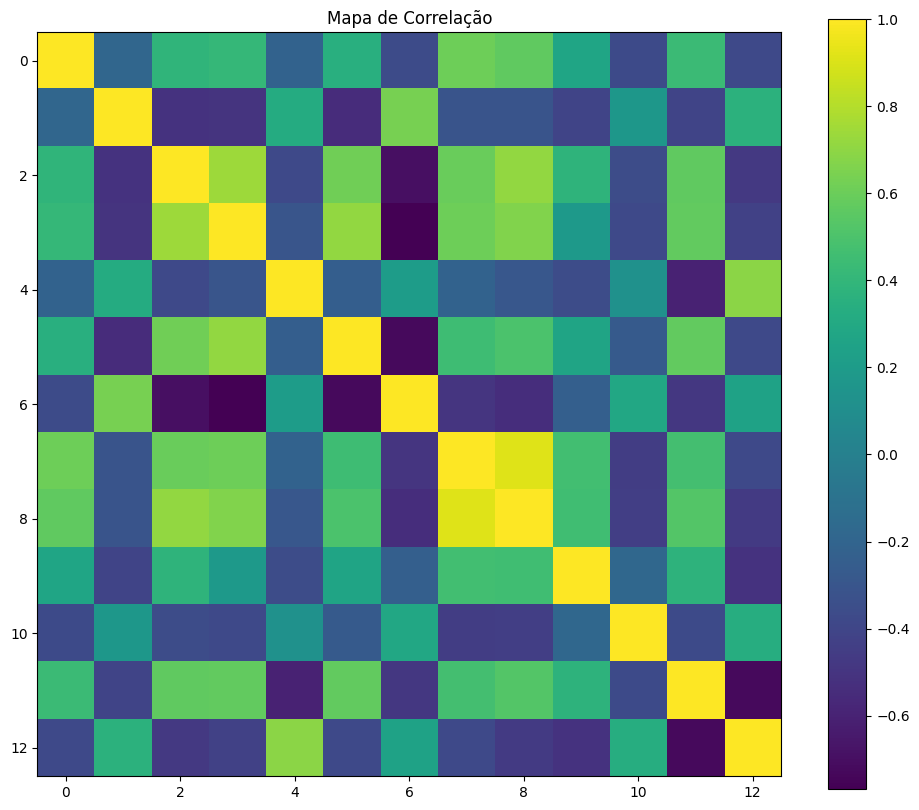

In [47]:
df.hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
plt.imshow(df.corr(), cmap='viridis')
plt.colorbar()
plt.title("Mapa de Correlação")
plt.show()

# Preparação dos Dados

Removemos a coluna alvo MEDV dos atributos e dividimos os dados em treino e teste.

In [48]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalização

Redes neurais requerem que os dados estejam normalizados, pois são sensíveis à escala.
Usamos StandardScaler para transformar os dados com média 0 e desvio-padrão 1.

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Arquitetura da Rede Neural (MLP)

Utilizamos uma MLP com quatro camadas densas e função de ativação ReLU.
A saída é um único neurônio porque se trata de um problema de regressão.

In [50]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=[X_train_scaled.shape[1]]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1)
])

/home/luchesi/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilação

Usamos o otimizador Adam, loss MSE (padrão para regressão) e métrica MAE.

In [51]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

model.summary()

# Early stopping
early_stop = keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

# Treinamento

Treinamos o modelo por 400 épocas, monitorando erro no conjunto de validação.

In [53]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=400,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.8418 - mae: 1.6570 - val_loss: 13.6210 - val_mae: 2.6216
Epoch 2/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7851 - mae: 1.6228 - val_loss: 12.4862 - val_mae: 2.5400
Epoch 3/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7279 - mae: 1.6305 - val_loss: 13.3915 - val_mae: 2.6336
Epoch 4/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.6287 - mae: 1.6049 - val_loss: 13.6811 - val_mae: 2.6363
Epoch 5/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.0697 - mae: 1.6673 - val_loss: 14.1883 - val_mae: 2.7144
Epoch 6/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7912 - mae: 1.6523 - val_loss: 14.0556 - val_mae: 2.5910
Epoch 7/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.4843 - mae: 1.6054 - val_loss: 12.2555 - val_mae: 2.5223
Epoch 8/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.6712 - mae: 1.6104 - val_loss: 12.4331 - val_mae: 2.4765
Epoch 9/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/ste

In [54]:
predictions = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MSE: 11.489202391937328
MAE: 2.292320399190865
R²: 0.8433300193061153


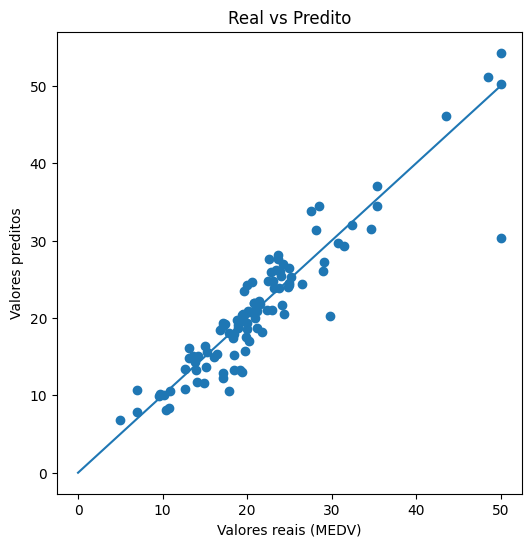

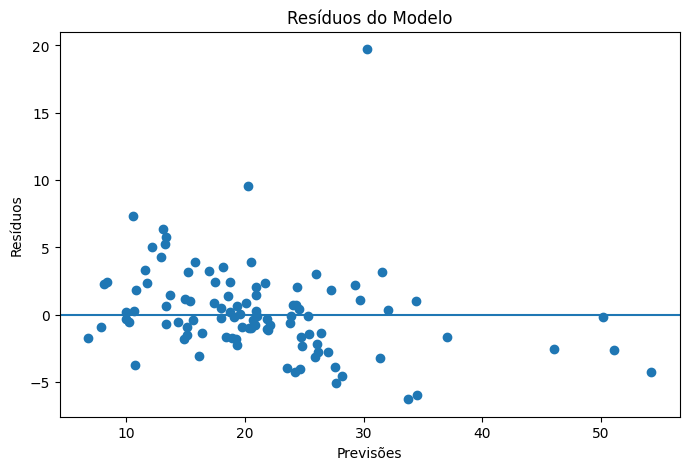

In [55]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions)
plt.xlabel("Valores reais (MEDV)")
plt.ylabel("Valores preditos")
plt.title("Real vs Predito")
plt.plot([0, 50], [0, 50])
plt.show()

residuals = y_test - predictions

plt.figure(figsize=(8,5))
plt.scatter(predictions, residuals)
plt.axhline(0)
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Resíduos do Modelo")
plt.show()

# Análise dos resultados

Com os ajustes realizados, o modelo apresentou:

- MSE: ~11.4

- MAE: ~2.29

- R²: 0.84

Esses valores mostram que:

- O modelo explica 84% da variância dos preços das casas.

- O erro médio absoluto é 2.29 mil dólares, considerado bom.

- O MSE está baixo para este dataset.

Os gráficos também mostram:

- Predições alinhadas à diagonal → bom ajuste

- Resíduos distribuídos sem padrão → baixa tendência sistemática

# Discussão

Pontos positivos

- A MLP captou bem a relação entre variáveis e preço.

- Rede neural permite modelar relações não lineares.

- R² acima de 0.8 é muito bom para esse dataset.

Limitações

- Dataset é pequeno (apenas 506 linhas)

- A MLP pode superajustar — reforçando a necessidade do validation split

- Variações pequenas no hyperparameter já mudam o resultado

Desafios

- Ajustar número de camadas, neurônios e taxa de aprendizado

- Evitar overfitting com dropout ou early stopping

# Conclusão

O modelo MLP implementado apresentou boa capacidade de prever o valor médio das casas em Boston, alcançando R² de 0.81. Isso demonstra que redes neurais podem ser eficazes em problemas de regressão tabular.

Aplicações práticas incluem:

- Modelos de avaliação imobiliária

- Ferramentas de planejamento urbano

- Sistemas de recomendação de preço

Melhorias futuras:

- Testar arquiteturas alternativas (Random Forest, XGBoost)

- Aplicar técnicas de regularização

- Cross-validation mais robusta